<a href="https://colab.research.google.com/github/bhuvangambhir/ShopSmart_E-Commerce-Visitor-Purchase-Prediction/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/shop_smart_ecommerce.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [9]:
df.shape

(12330, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [12]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [14]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [15]:
le = LabelEncoder()
sc = StandardScaler()

In [17]:
columns = ['Month', 'VisitorType', 'Weekend',  'Revenue' ]
for col in columns:
  df[col] = le.fit_transform(df[col])
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,2,2,2,1,2,2,0,0


In [18]:
df['Month'].unique()

array([2, 5, 6, 8, 4, 3, 0, 7, 9, 1])

In [19]:
x = df.drop('Revenue', axis=1)
y = df['Revenue']

In [20]:
X_train, X_test, y_train, y_test = (train_test_split(x, y, test_size=0.2, random_state=42))

In [30]:
best_accuracy = 0
best_model_dt = None
best_max_depth = None
best_min_split = None

max_depth = np.arange(2, 20)
min_split = np.arange(10, 50, 5)

for i in max_depth:
  for j in min_split:
    model_dt = DecisionTreeClassifier(max_depth = i, min_samples_split = j, random_state=42)
    model_dt.fit(X_train, y_train)

    y_pred = model_dt.predict(X_test)
    current_accuracy = accuracy_score(y_test, y_pred)

    if current_accuracy > best_accuracy:
      best_accuracy = current_accuracy
      best_model_dt = model_dt
      best_max_depth = i
      best_min_split = j

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Min Samples Split: {best_min_split}")

Best Accuracy: 0.8949716139497161
Best Max Depth: 8
Best Min Samples Split: 25


In [31]:
confusion_matrix(y_test, y_pred)

array([[1952,  103],
       [ 180,  231]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2055
           1       0.69      0.56      0.62       411

    accuracy                           0.89      2466
   macro avg       0.80      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [34]:
f1_score(y_test, y_pred)

0.6201342281879194

In [35]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.00000000e+00 5.04874258e-05 6.23869237e-05 6.49863789e-05
 6.52552880e-05 6.66342662e-05 6.68431325e-05 6.71197248e-05
 6.72124316e-05 7.91248788e-05 8.01199341e-05 8.06802107e-05
 8.11030008e-05 8.12289371e-05 8.26914236e-05 8.47895008e-05
 8.48994082e-05 8.68960723e-05 8.75249498e-05 8.87064071e-05
 8.97744764e-05 9.01144453e-05 9.01144453e-05 9.01144453e-05
 9.07952550e-05 9.07982102e-05 9.21625009e-05 9.21625009e-05
 9.21625009e-05 9.21625009e-05 9.29305218e-05 9.29305218e-05
 9.46201676e-05 9.46201676e-05 9.54152951e-05 9.57465982e-05
 9.60178457e-05 9.60430273e-05 9.60430273e-05 9.63098135e-05
 9.63098135e-05 9.65173138e-05 9.65511914e-05 9.65511914e-05
 9.68730287e-05 9.69278700e-05 9.69709792e-05 9.69709792e-05
 9.73236010e-05 9.74795683e-05 9.74795683e-05 9.77580813e-05
 9.81603780e-05 9.83066676e-05 9.83970230e-05 9.86387848e-05
 9.89649712e-05 9.90211056e-05 9.92217563e-05 9.93097969e-05
 9.95684162e-05 9.96604671e-05 9.96891052e-05 9.98427093e-05
 9.98656353e-05 1.001999

In [37]:
trees = []

for alpha in ccp_alphas:
    model_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model_alpha.fit(X_train, y_train)

    trees.append((model_alpha, alpha))

In [38]:
best_acc = 0
best_alpha = 0

for model_alpha, alpha in trees:
    curr_acc = model_alpha.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

In [39]:
best_acc

0.8969991889699919

In [43]:
best_model_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
best_model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00029830103832064175),
                       random_state=42)

In [44]:
y_pred_best = best_model_dt.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred_best)

0.8969991889699919

In [46]:
confusion_matrix(y_test, y_pred_best)

array([[1977,   78],
       [ 176,  235]])

In [47]:
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2055
           1       0.75      0.57      0.65       411

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [48]:
f1_score(y_test, y_pred_best)

0.649171270718232

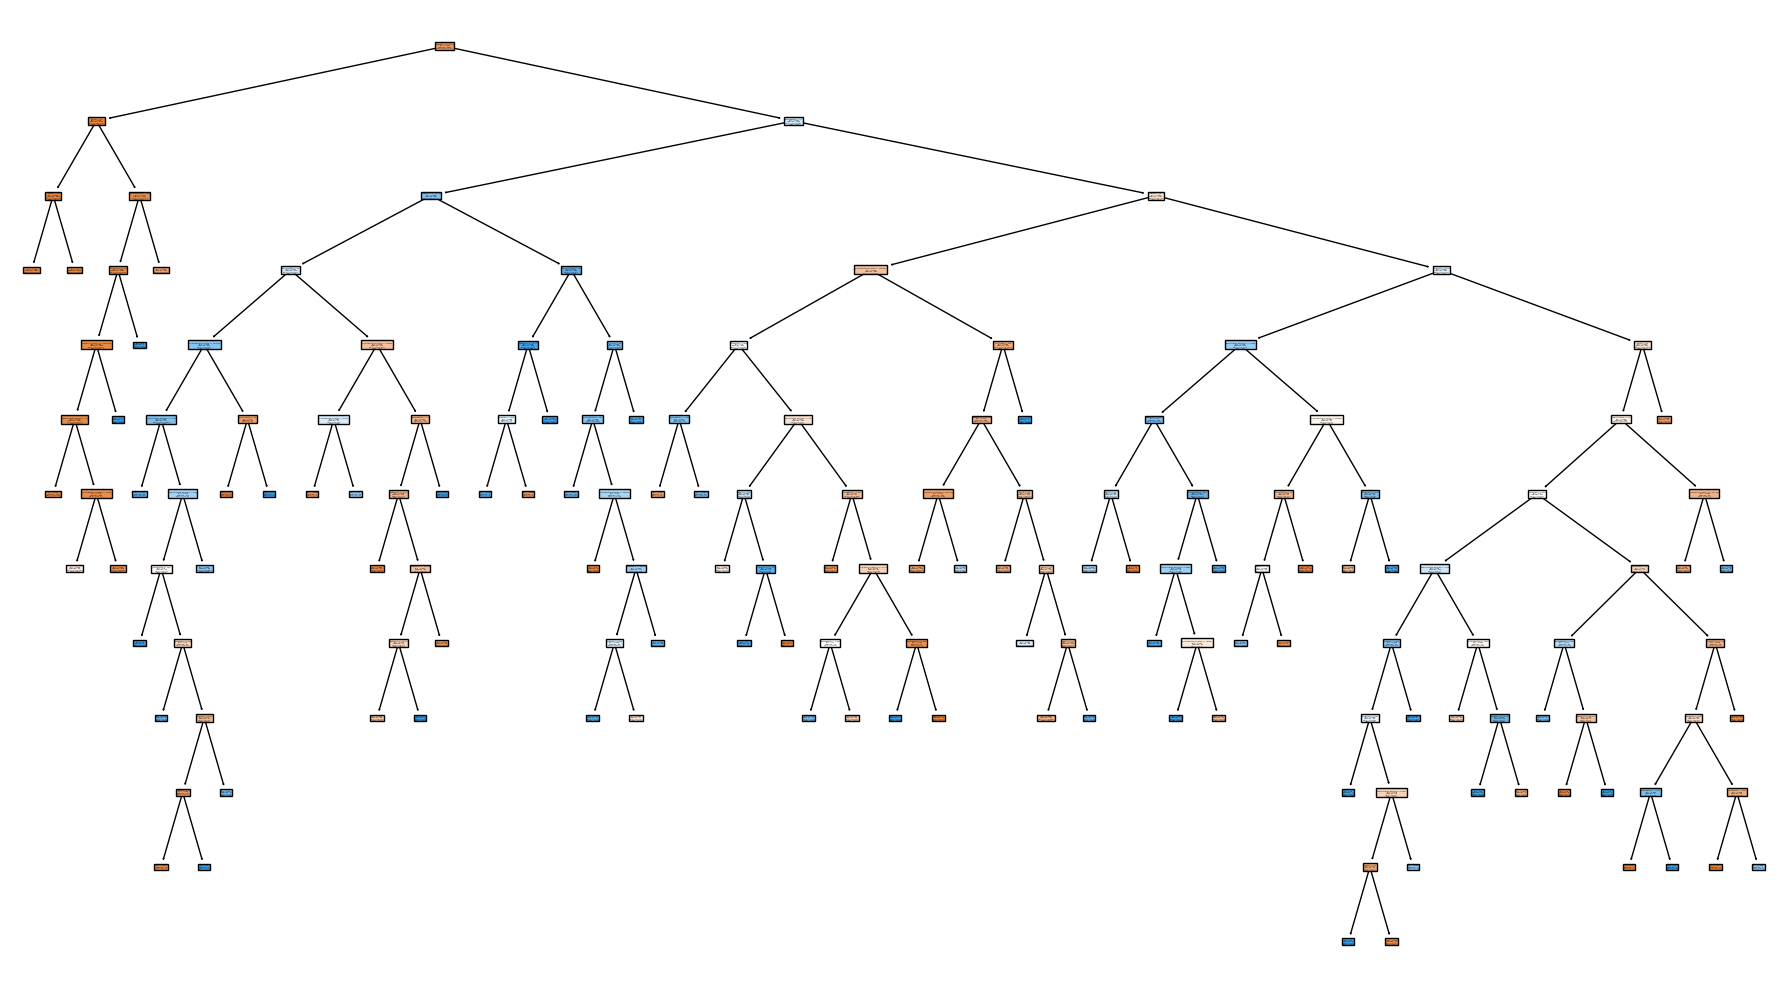

In [58]:
plt.figure(figsize=(18, 10))
plot_tree(best_model_dt,
          feature_names=x.columns,
          class_names= ["False", "True"],
          filled=True
)
plt.tight_layout()
plt.show()

In [49]:
model_dt_new = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=best_max_depth, min_samples_split=best_min_split, random_state=42)
model_dt_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00029830103832064175),
                       max_depth=np.int64(8), min_samples_split=np.int64(25),
                       random_state=42)

In [50]:
y_pred_new = model_dt_new.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred_new)

0.8953771289537713

In [52]:
confusion_matrix(y_test, y_pred_new)

array([[1984,   71],
       [ 187,  224]])

In [53]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.63       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [54]:
f1_score(y_test, y_pred_new)

0.6345609065155807

In [60]:
import joblib
joblib.dump(best_model_dt, 'best_model_dt.pkl')
joblib.dump(le, 'le.pkl')

['le.pkl']